In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **PROFIL DATA**

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print("Initial Dataset Head: ")
print(df.head())
print("Initial Dataset Info: ")
print(df.info())

Initial Dataset Head: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Initial Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   in

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **DATA PREPROCESSING (DATA CLEANING)**

In [7]:

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for null values
print("Number of null values per column:\n", df.isnull().sum())

# Handling outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply outlier handling to relevant numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Example columns, replace with your actual numerical columns
for col in numerical_cols:
    df = handle_outliers(df, col)

# Display info after preprocessing
print("\nDataset Info after preprocessing:")
print(df.info())
print("\nDataset Description after preprocessing:")
print(df.describe())

Number of duplicate rows: 723
Number of null values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  t

In [8]:
#Normalisasi data untuk memastikan semua fitur berada dalam rentang nilai yang seragam.

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display info after normalization
print("\nDataset Info after normalization:")
print(df.info())
print("\nDataset Description after normalization:")
print(df.describe())


Dataset Info after normalization:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.4 KB
None

Dataset Description after normalization:
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000

#  **PEMILIHAN FITUR**

In [9]:
# Menggunakan algoritma seperti Recursive Feature Elimination (RFE) atau metode statistik seperti Correlation Matrix untuk memilih fitur yang relevan.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize the Logistic Regression model (you can use other models too)
model = LogisticRegression()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features

# Fit the RFE object to the data
rfe = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features using RFE:")
print(selected_features)

Selected Features using RFE:
Index(['sex', 'thalach', 'exang', 'oldpeak', 'thal'], dtype='object')


In [10]:
# Correlation Matrix
correlation_matrix = df.corr()

# Print the correlation matrix (optional)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.290209  0.198901  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.048559 -0.178446  0.046022   
cp       -0.063107 -0.051740  1.000000  0.055026 -0.089633  0.096018   
trestbps  0.290209 -0.048559  0.055026  1.000000  0.135429  0.169049   
chol      0.198901 -0.178446 -0.089633  0.135429  1.000000  0.013221   
fbs       0.119492  0.046022  0.096018  0.169049  0.013221  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.117933 -0.137117 -0.083081   
thalach  -0.394960 -0.045414  0.293351 -0.055130 -0.014519 -0.008013   
exang     0.093216  0.143460 -0.392937  0.056350  0.080653  0.024729   
oldpeak   0.209143  0.107575 -0.142327  0.182151  0.053210  0.010471   
slope    -0.164124 -0.032990  0.116854 -0.115248  0.010459 -0.058654   
ca        0.302261  0.113060 -0.195356  0.100350  0.095374  0.144935   
thal      0.065317  0.211452 -0.160370  0.0

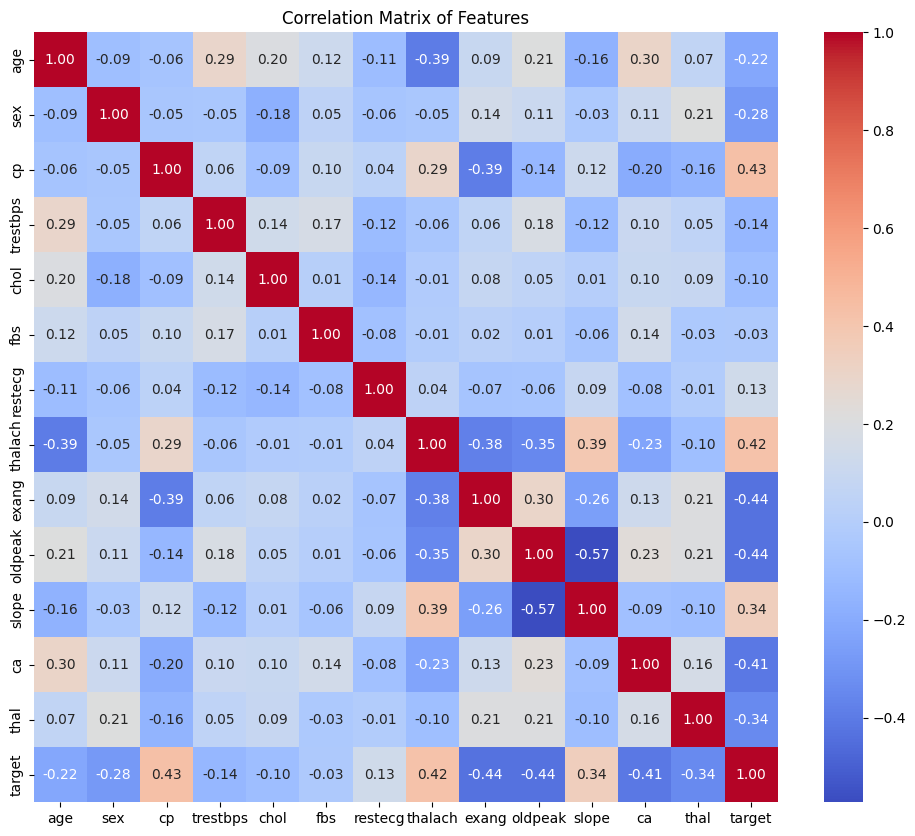

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [12]:

# Example based on correlation to the 'target' variable
correlation_with_target = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(correlation_with_target)

# You can select the top features based on the correlation value
# For example, to select the top 5 features
top_n_features = 5
selected_features_corr = correlation_with_target.index[1:top_n_features + 1]  # Exclude target itself
print(f"\nTop {top_n_features} features based on correlation:\n{selected_features_corr}")


Correlation with target variable:
target      1.000000
exang       0.435601
oldpeak     0.435099
cp          0.432080
thalach     0.420408
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.140083
restecg     0.134874
chol        0.099932
fbs         0.026826
Name: target, dtype: float64

Top 5 features based on correlation:
Index(['exang', 'oldpeak', 'cp', 'thalach', 'ca'], dtype='object')


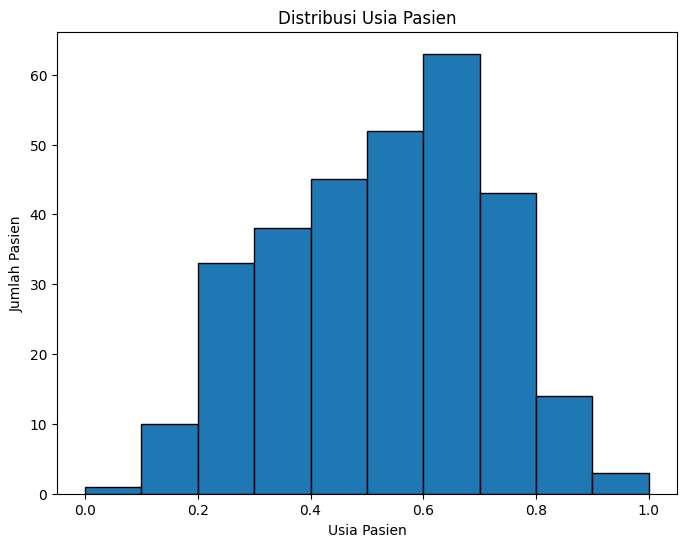

In [18]:
# Grafik histogram digunakan untuk menunjukkan distribusi usia pasien.
# Assuming 'df' is your DataFrame and 'age' is the column containing patient ages.
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Usia Pasien')
plt.ylabel('Jumlah Pasien')
plt.title('Distribusi Usia Pasien')
plt.show()

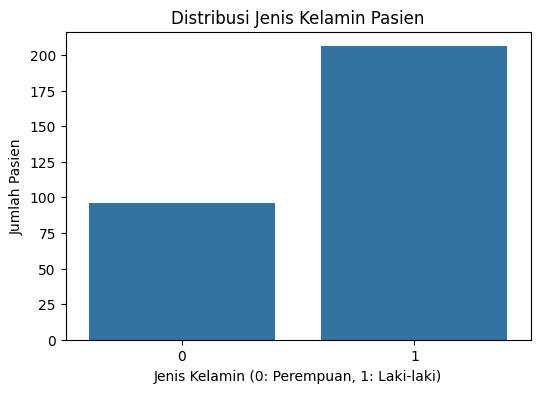

In [19]:

# Grafik batang untuk distribusi jenis kelamin pasien
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)  # Assuming 'sex' column represents gender (0 or 1)
plt.xlabel('Jenis Kelamin (0: Perempuan, 1: Laki-laki)') # Assuming 0 represents female, and 1 represents male.  Adjust if needed.
plt.ylabel('Jumlah Pasien')
plt.title('Distribusi Jenis Kelamin Pasien')
plt.show()

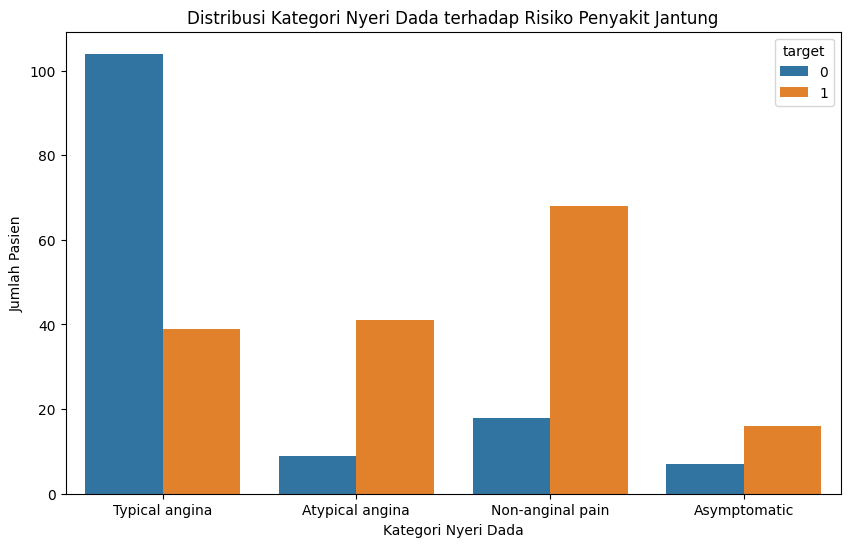

In [20]:
# Grafik batang untuk distribusi kategori nyeri dada terhadap risiko penyakit jantung
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.xlabel('Kategori Nyeri Dada')
plt.ylabel('Jumlah Pasien')
plt.title('Distribusi Kategori Nyeri Dada terhadap Risiko Penyakit Jantung')
plt.xticks(ticks=[0,1,2,3], labels=['Typical angina', 'Atypical angina', 'Non-anginal pain','Asymptomatic'])
plt.show()

# **MODELLING**

SVM Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.76      0.97      0.85        29

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61



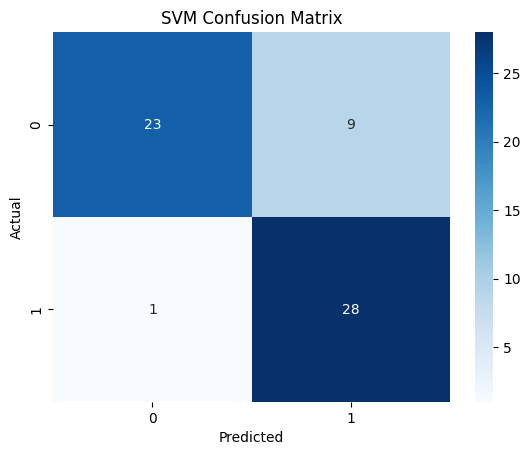

In [25]:
# Algoritma Logistic Regression dan Support Vector Machine (SVM) dipilih untuk membangun model.

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

print(classification_report(y_test, y_pred_svm))

# Create and display the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

Logistic Regression Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



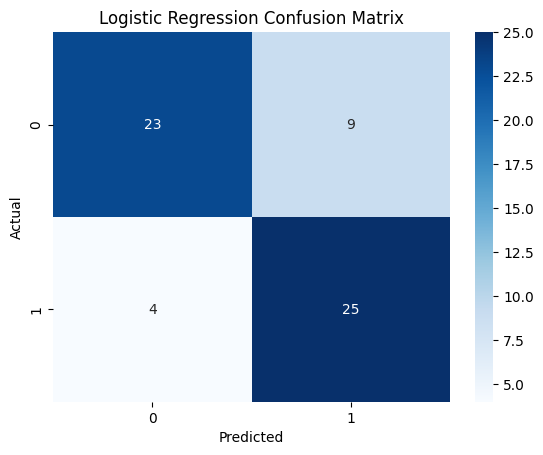

In [23]:

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

print(classification_report(y_test, y_pred_logreg))

# Create and display the confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [26]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)  # Use y_pred_logreg for logistic regression
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.8360655737704918
Precision: 0.7567567567567568
Recall: 0.9655172413793104
F1-score: 0.8484848484848485


SVM Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



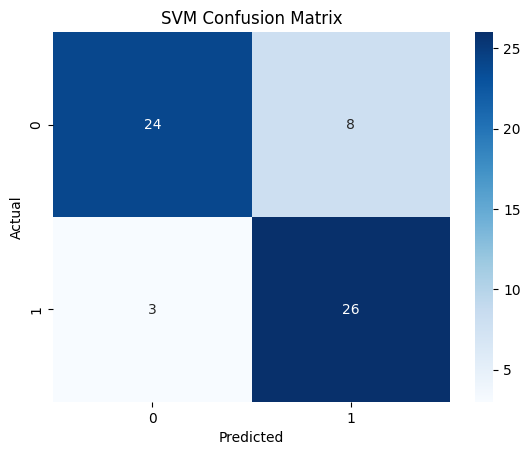

In [27]:
# Untuk klasifikasi berbasis margin yang maksimal, terutama jika data memiliki dimensi tinggi.

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear') # You can try different kernels like 'rbf', 'poly' etc.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

print(classification_report(y_test, y_pred_svm))

# Create and display the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# **Evaluasi Model**

In [28]:
# Menggunakan metrik seperti Accuracy, Precision, Recall, dan F1-Score untuk mengevaluasi performa model.

# Evaluate the model using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7377049180327869
Precision: 0.6585365853658537
Recall: 0.9310344827586207
F1-Score: 0.7714285714285715


In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


Cross-Validation Scores: [0.85245902 0.80327869 0.91666667 0.78333333 0.8       ]
Mean CV Accuracy: 0.8311475409836065
Standard Deviation of CV Accuracy: 0.04858135556295314


😑